#  Car Price Prediction Model
# ~ Maitreya Kadam

Installing the dependencies

In [197]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Data Collection and Processing

In [198]:
data=pd.read_csv("car data.csv")

In [199]:
# inspecting the first 5 rows of the dataframe
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [200]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [201]:
# checking the number of rows and columns
data.shape

(301, 9)

In [202]:
# getting some information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [203]:
# checking the number of missing values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From the above, we can conclude that there are no null values in the data set

In [204]:
# checking the unique values so that we can use dummy variables if there are any
print(data['Car_Name'].unique())
print(data["Fuel_Type"].unique())
print(data['Seller_Type'].unique())
print(data["Transmission"].unique())
print(data["Owner"].unique())

['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'Hero Splend

Creating the dummy variables

In [205]:
name_df=pd.get_dummies(data['Car_Name'])

In [206]:
name_df.head(5)

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [207]:
fuel_df=pd.get_dummies(data["Fuel_Type"])

In [208]:
fuel_df

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [209]:
sell_df=pd.get_dummies(data['Seller_Type'])

In [210]:
trans_df=pd.get_dummies(data["Transmission"])

In [211]:
own_df=pd.get_dummies(data["Owner"])

In [212]:
merge_dummy=pd.concat([name_df,fuel_df,sell_df,trans_df,own_df],axis="columns")

Successfully created the dummy variable dataset

In [213]:
merge_dummy

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual,0,1,3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
299,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


Now dropping the unnecessary columns in the main dataset

In [214]:
drop_data=data.drop(['Car_Name',"Fuel_Type",'Seller_Type',"Transmission",'Owner'],axis='columns')

In [215]:
drop_data

,Year,Selling_Price,Present_Price,Kms_Driven
0,2014,3.35,5.59,27000
1,2013,4.75,9.54,43000
2,2017,7.25,9.85,6900
3,2011,2.85,4.15,5200
4,2014,4.60,6.87,42450
...,...,...,...,...
296,2016,9.50,11.60,33988
297,2015,4.00,5.90,60000
298,2009,3.35,11.00,87934
299,2017,11.50,12.50,9000


Now merging the data with the dummy variables

In [216]:
merge=pd.concat([merge_dummy,drop_data],axis='columns')

In [217]:
merge

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,...,Individual,Automatic,Manual,0,1,3,Year,Selling_Price,Present_Price,Kms_Driven
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2014,3.35,5.59,27000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2013,4.75,9.54,43000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2017,7.25,9.85,6900
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2011,2.85,4.15,5200
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2014,4.60,6.87,42450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2016,9.50,11.60,33988
297,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2015,4.00,5.90,60000
298,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2009,3.35,11.00,87934
299,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,2017,11.50,12.50,9000


In [218]:
merge.shape

(301, 112)

Now Splitting the dataset for training and testing

In [219]:
x=merge.drop('Selling_Price',axis='columns').values
y=merge['Selling_Price'].values

In [220]:
x

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0140e+03, 5.5900e+00,
        2.7000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0130e+03, 9.5400e+00,
        4.3000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0170e+03, 9.8500e+00,
        6.9000e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0090e+03, 1.1000e+01,
        8.7934e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0170e+03, 1.2500e+01,
        9.0000e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0160e+03, 5.9000e+00,
        5.4640e+03]])

Creating training model using LinearRegression class

In [221]:
linear_reg=linear_model.LinearRegression()
print("Model Successfully Created")

Model Successfully Created


In [222]:
# Creating training and testing sets for training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [223]:
x_train

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0140e+03, 8.9300e+00,
        8.3000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0120e+03, 4.4300e+00,
        2.3709e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0170e+03, 3.6230e+01,
        6.0000e+03],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0150e+03, 1.9000e+00,
        1.4000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0060e+03, 4.1500e+00,
        6.5000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0140e+03, 6.4000e-01,
        1.3700e+04]])

In [224]:
x_test

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0150e+03, 9.4000e+00,
        6.1381e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0110e+03, 8.2600e-01,
        6.0000e+03],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0150e+03, 5.7000e+00,
        2.4678e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0130e+03, 5.8700e+00,
        5.5138e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0140e+03, 3.4500e+00,
        1.6500e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0050e+03, 1.3700e+01,
        7.5000e+04]])

In [225]:
y_train

array([ 4.9 ,  2.  , 33.  ,  3.75,  5.65,  8.55,  3.8 ,  0.4 ,  2.65,
        2.85,  2.65,  0.48,  6.15,  0.31,  6.  ,  0.55,  9.15,  0.35,
        2.25,  0.45, 17.  ,  4.85,  5.75,  6.45,  1.1 ,  5.35,  5.5 ,
        0.6 ,  5.3 ,  0.65,  6.  ,  8.99,  1.25,  5.2 ,  0.2 ,  0.5 ,
        0.45,  1.45,  2.75,  3.1 ,  3.25,  0.42,  5.4 ,  0.95,  0.9 ,
        4.5 ,  3.  ,  5.95,  3.1 , 10.11,  3.15,  0.48,  0.45,  6.  ,
       12.5 ,  0.65,  7.9 ,  6.95,  0.48,  2.1 ,  1.2 ,  4.9 ,  7.45,
        0.4 ,  7.25,  4.5 ,  3.95,  1.2 ,  5.3 ,  3.1 ,  4.6 , 20.75,
        0.42,  4.5 ,  9.25,  0.6 ,  0.1 ,  0.5 ,  5.25,  5.85,  0.25,
        6.1 ,  1.25,  0.15,  2.85,  0.45,  0.9 ,  2.9 ,  3.1 ,  1.5 ,
        6.  ,  0.25,  2.65, 10.25,  3.9 ,  8.35, 14.73, 23.  ,  7.25,
       11.25,  1.35,  0.3 , 35.  ,  2.85,  0.2 ,  4.1 ,  2.55,  2.25,
        0.48, 14.9 ,  2.9 ,  9.1 ,  1.  ,  4.1 , 18.75,  0.2 ,  4.95,
        0.75,  3.25,  6.7 ,  5.5 ,  1.15,  0.6 ,  0.12,  3.5 ,  0.51,
        1.15,  5.25,

In [226]:
y_test

array([ 8.25,  0.5 ,  5.25,  9.5 , 18.  ,  5.5 ,  3.75,  0.45,  4.5 ,
        4.5 ,  2.7 ,  0.72,  5.25,  7.5 ,  7.75, 19.75,  7.4 ,  4.75,
        0.35,  1.7 ,  4.4 ,  5.25,  5.11, 11.25,  0.2 ,  0.78,  0.38,
        0.65,  0.5 ,  3.6 ,  3.25,  7.2 ,  0.6 ,  8.75,  3.  ,  1.15,
        6.6 ,  4.75,  0.25,  8.25,  9.25, 19.99,  5.5 ,  4.75,  5.5 ,
       12.9 ,  0.3 ,  1.05,  5.25,  6.5 ,  7.5 ,  2.9 ,  4.8 , 23.5 ,
        1.2 ,  1.1 ,  0.65,  2.55,  4.15,  1.35,  3.51])

In [227]:
linear_reg.fit(x_train,y_train)

LinearRegression()

Predicting the values using the test set

In [228]:
y_pred=linear_reg.predict(x_test)

#  Evaluating the model

In [229]:
linear_reg.score(x,y)

0.9399919388423605

In [230]:
r2_score(y_test,y_pred)

0.952171438772591

Creating a compare dataframe to check whether our predicted values and actual values are almost same

In [231]:
compare_df=pd.DataFrame(
{
    "Actual":y_test,
    "Predicted":y_pred,
    "Difference":y_test-y_pred
})

In [232]:
compare_df

,Actual,Predicted,Difference
0,8.25,7.238292,1.011708
1,0.50,-1.302260,1.802260
2,5.25,4.618115,0.631885
3,9.50,8.991310,0.508690
4,18.00,17.448449,0.551551
...,...,...,...
56,0.65,-0.064314,0.714314
57,2.55,2.562345,-0.012345
58,4.15,3.622291,0.527709
59,1.35,2.608383,-1.258383


Now Predicting the whole dataset

In [233]:
pred_y=linear_reg.predict(x)


In [234]:
pred_y  # Predicted values for the whole dataset

array([ 3.89850923,  7.01579866,  8.10599816,  2.80153136,  5.38663552,
        9.83758151,  5.81852827,  7.15100581,  7.38384202,  6.69146902,
        2.85      ,  7.50804858,  7.10186578,  5.33552277,  1.47190838,
        8.1843707 ,  7.58058497,  8.1843707 ,  3.82781396,  3.76826462,
        3.90801831,  4.9       ,  4.55622839,  2.30931249,  3.9391619 ,
        2.04627239,  3.62229057,  5.3514249 ,  0.16073393,  7.53525321,
        3.30764911,  1.53556421,  5.76566719,  6.46340937,  5.6769546 ,
        2.37218604,  5.25467362,  0.35      ,  3.86431055, -0.59340622,
        5.85      ,  2.60762473,  1.9871569 ,  5.673418  ,  1.25      ,
        7.72291969,  2.70827746, -0.51850722,  5.3361122 ,  7.84070275,
       17.94851233, 20.07124013, 17.44844873, 17.17101757,  2.22755753,
        3.869251  ,  4.32222409,  6.42169897,  4.1       , 22.59262165,
        8.33740273,  4.5740071 , 22.42485975, 23.17519683, 24.73890483,
        4.93612389, 18.93671622, 10.7818988 ,  4.04584856, 11.64

In [235]:
pred_whole=pd.DataFrame({
    "Predicted Selling Prices":pred_y
})


In [236]:
pred_whole  # Predicted Prices for the whole dataset

,Predicted Selling Prices
0,3.898509
1,7.015799
2,8.105998
3,2.801531
4,5.386636
...,...
296,8.991310
297,4.602745
298,3.615662
299,10.241888


Making a new well organised dataset

In [237]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [238]:
new_confirm_predicted=pd.DataFrame({
    "Car Name":data["Car_Name"],
    "Year": data["Year"],
    "Kms Driven":data['Kms_Driven'],
    "Fuel Type":data['Fuel_Type'],
    "Seller Type":data["Seller_Type"],
    "Transmission": data['Transmission'],
    "Selling Price":data["Selling_Price"],
    "Predicted Selling Price": pred_y,
    "Present Price":data['Present_Price'],
    "Owner":data["Owner"]
})

In [239]:
new_confirm_predicted

,Car Name,Year,Kms Driven,Fuel Type,Seller Type,Transmission,Selling Price,Predicted Selling Price,Present Price,Owner
0,ritz,2014,27000,Petrol,Dealer,Manual,3.35,3.898509,5.59,0
1,sx4,2013,43000,Diesel,Dealer,Manual,4.75,7.015799,9.54,0
2,ciaz,2017,6900,Petrol,Dealer,Manual,7.25,8.105998,9.85,0
3,wagon r,2011,5200,Petrol,Dealer,Manual,2.85,2.801531,4.15,0
4,swift,2014,42450,Diesel,Dealer,Manual,4.60,5.386636,6.87,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,33988,Diesel,Dealer,Manual,9.50,8.991310,11.60,0
297,brio,2015,60000,Petrol,Dealer,Manual,4.00,4.602745,5.90,0
298,city,2009,87934,Petrol,Dealer,Manual,3.35,3.615662,11.00,0
299,city,2017,9000,Diesel,Dealer,Manual,11.50,10.241888,12.50,0


In [241]:
new_confirm_predicted.to_csv("Predicted_Prices_Car.csv",index="False")

#  Visualize the actual prices and the predicted prices

In [244]:
x_data=new_confirm_predicted["Selling Price"].values
y_data=new_confirm_predicted["Predicted Selling Price"].values

In [245]:
x_data # Actual Prices

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

In [246]:
y_data # Predicted Prices

array([ 3.89850923,  7.01579866,  8.10599816,  2.80153136,  5.38663552,
        9.83758151,  5.81852827,  7.15100581,  7.38384202,  6.69146902,
        2.85      ,  7.50804858,  7.10186578,  5.33552277,  1.47190838,
        8.1843707 ,  7.58058497,  8.1843707 ,  3.82781396,  3.76826462,
        3.90801831,  4.9       ,  4.55622839,  2.30931249,  3.9391619 ,
        2.04627239,  3.62229057,  5.3514249 ,  0.16073393,  7.53525321,
        3.30764911,  1.53556421,  5.76566719,  6.46340937,  5.6769546 ,
        2.37218604,  5.25467362,  0.35      ,  3.86431055, -0.59340622,
        5.85      ,  2.60762473,  1.9871569 ,  5.673418  ,  1.25      ,
        7.72291969,  2.70827746, -0.51850722,  5.3361122 ,  7.84070275,
       17.94851233, 20.07124013, 17.44844873, 17.17101757,  2.22755753,
        3.869251  ,  4.32222409,  6.42169897,  4.1       , 22.59262165,
        8.33740273,  4.5740071 , 22.42485975, 23.17519683, 24.73890483,
        4.93612389, 18.93671622, 10.7818988 ,  4.04584856, 11.64

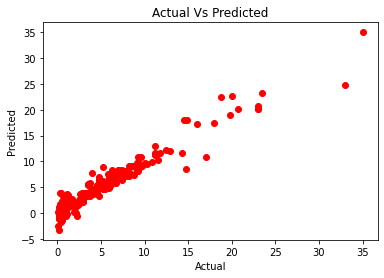

In [247]:
# visualize the plot
plt.scatter(x_data,y_data,color="red")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual Vs Predicted")
plt.show()

Thus the Car Price Prediction Model is Successfully trained and created